# Deep Learning
## Paper Structure
* Introduction
* Supervised Learning (repitition)
    * Stochastic Gradient Descent
* Backpropagation to train multilayer architectures
* Convolutional neural networks &rarr; image understanding
* Recurrent neural networks &rarr; language processing
* Future of deep learning


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

# Supervised Learning
## Stochastic Gradient Descent

In [2]:
# Random features, Gaussian distributed
np.random.seed(4)
x = np.hstack([[np.random.normal(-1, 1, 25), np.random.normal(-1, 1, 25)], 
               [np.random.normal(1, 1, 25), np.random.normal(1, 1, 25)]]).T

# Orderd labels, either 1 or -1!
label = np.hstack((np.ones(25), (np.ones(25)*-1))).T
label_bool1 = label==1
label_bool2 = label==-1

In [44]:
# Define Plotting Function
def plot_sdg(i):
    plt.figure(figsize=(10, 8))
    # Make weights visible                  
    plt.plot([0, w[0]], [0, w[1]], 'k-', linewidth = 2)                    
    plt.plot(w_b_vis[:,0], w_b_vis[:,1], 'k--')
    # Visualize generated data
    plt.scatter(x[:,0], x[:,1], s=label_bool1*100, marker='^')
    plt.scatter(x[:,0], x[:,1], s=label_bool2*100, marker='o')
    # Misclassified points
    plt.scatter(x[:,0], x[:,1], s=misclass_res*300, facecolors='none', edgecolors='r')
    # Chosen misclassified point
    plt.scatter(x_chosen[0, 0], x_chosen[0, 1], s=200, marker='x')
    plt.axis('equal')
    plt.legend(["w", "$w^T x=0$","Class 1", "Class -1", "Misclassified", "SGD Chosen"])
    plt.title("Iteration {}, Missclassified points {}".format(i, sum(misclass_res)))

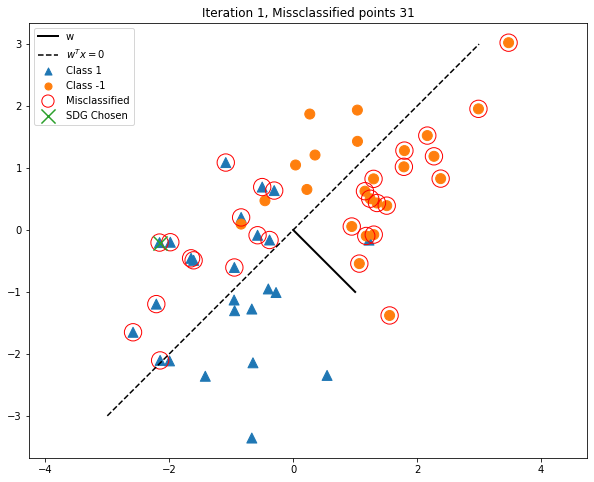

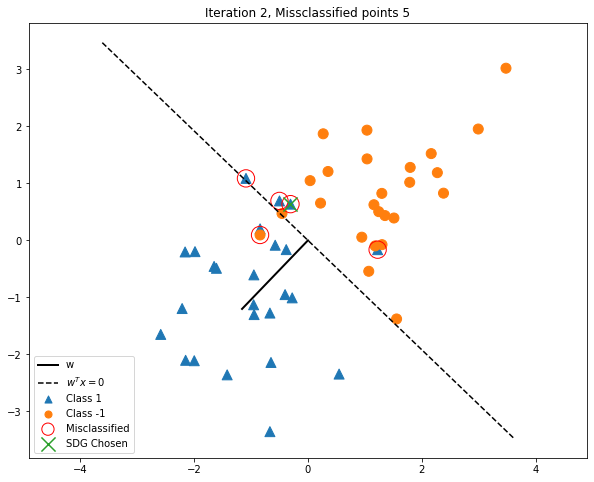

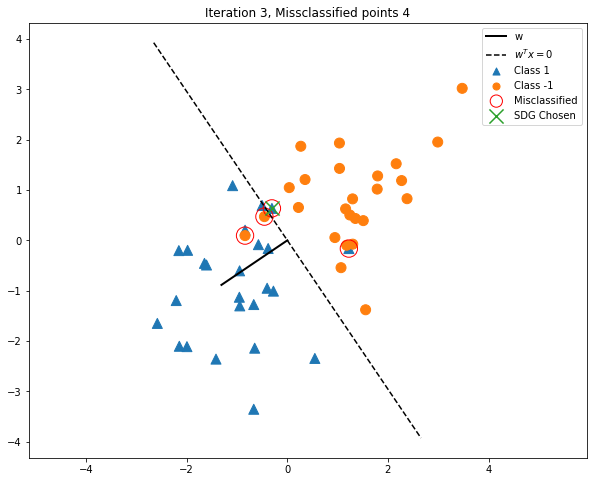

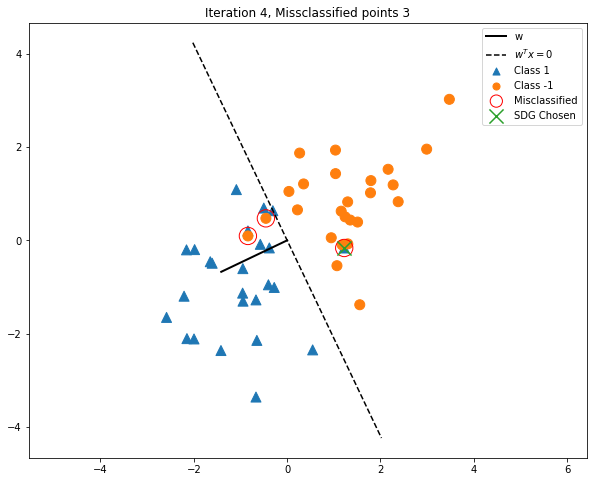

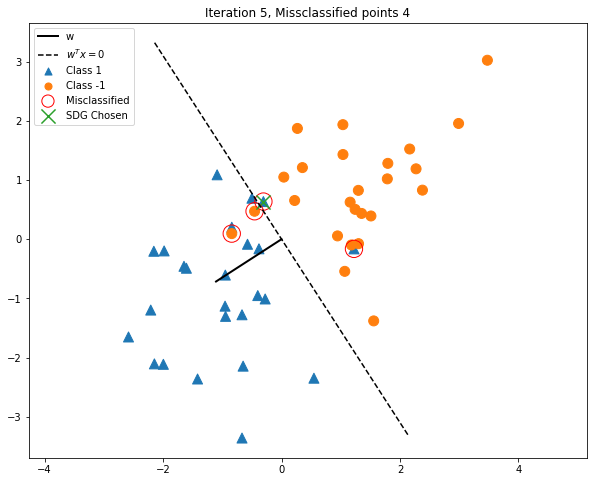

In [53]:
# Start iterative process:
# Pick one random Misclassified point
# Initialize
w = np.array([1, -1])
T = np.array([[0, -1], [1, 0]])  # Transformation Auxiliary
eta = 1
for i in range(1, 6):
    # Make weights visible, _b is its boundary!!
    w_b = np.dot(w, T)
    w_b_vis = np.vstack((w_b*3, w_b*-3))      
    # Misclassified points
    classification = np.sign(np.dot(x, w))
    misclass_res = classification!=label  # True = wrong classified

    x_misclassified = x[misclass_res]
    index = np.random.choice(len(x_misclassified), 1)
    x_chosen = x_misclassified[index]
    chosen_label = label[misclass_res][index]
    # Plot results
    plot_sdg(i)
    
    # Update w
    w = w + eta/i * np.dot(x_chosen.T, chosen_label)

# MNIST Example
With the help from https://nextjournal.com/gkoehler/digit-recognition-with-keras

In [34]:
# imports for array-handling and plotting
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# let's keep our keras backend tensorflow quiet
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
# for testing on CPU
#os.environ['CUDA_VISIBLE_DEVICES'] = ''

# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [35]:
# Loading the data (100MB!)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

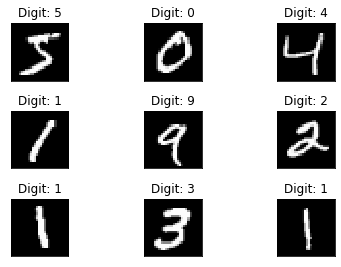

In [36]:
# Plotting first 9 Pictures in a 9x9 Raster
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])

In [37]:
# Print some info about our data
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [38]:
# Setting up an array for the true label instead of only the integer to compute the error later

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [39]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(784, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(784))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [40]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [41]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

Epoch 1/20
469/469 - 7s - loss: 0.2258 - accuracy: 0.9332 - val_loss: 0.0982 - val_accuracy: 0.9693
Epoch 2/20
469/469 - 6s - loss: 0.0917 - accuracy: 0.9717 - val_loss: 0.0866 - val_accuracy: 0.9725
Epoch 3/20
469/469 - 6s - loss: 0.0652 - accuracy: 0.9787 - val_loss: 0.0705 - val_accuracy: 0.9787
Epoch 4/20
469/469 - 6s - loss: 0.0504 - accuracy: 0.9835 - val_loss: 0.0690 - val_accuracy: 0.9796
Epoch 5/20
469/469 - 6s - loss: 0.0416 - accuracy: 0.9862 - val_loss: 0.0673 - val_accuracy: 0.9790
Epoch 6/20
469/469 - 7s - loss: 0.0356 - accuracy: 0.9880 - val_loss: 0.0626 - val_accuracy: 0.9812
Epoch 7/20
469/469 - 6s - loss: 0.0304 - accuracy: 0.9896 - val_loss: 0.0904 - val_accuracy: 0.9757
Epoch 8/20
469/469 - 6s - loss: 0.0276 - accuracy: 0.9909 - val_loss: 0.0739 - val_accuracy: 0.9810
Epoch 9/20
469/469 - 6s - loss: 0.0270 - accuracy: 0.9911 - val_loss: 0.0696 - val_accuracy: 0.9836
Epoch 10/20
469/469 - 6s - loss: 0.0270 - accuracy: 0.9912 - val_loss: 0.0656 - val_accuracy: 0.9826

Saved trained model at keras_mnist.h5 


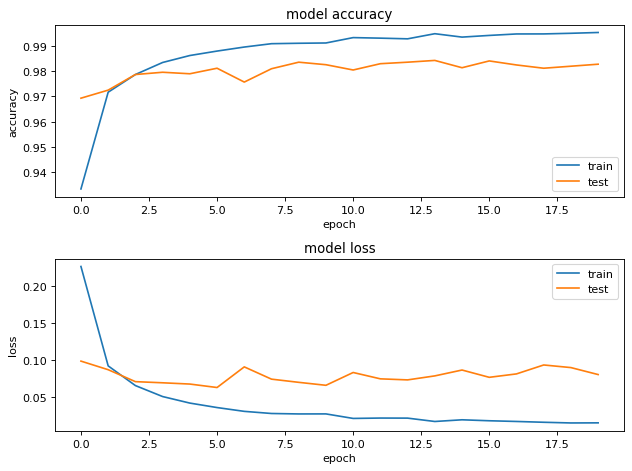

In [42]:
# saving the model
save_dir = ""
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# plotting the metrics
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [16]:
# Check, how well our model performs
mnist_model = load_model("keras_mnist.h5")
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.0845 - accuracy: 0.9835
Test Loss 0.08453010022640228
Test Accuracy 0.9835000038146973


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

9835  classified correctly
165  classified incorrectly


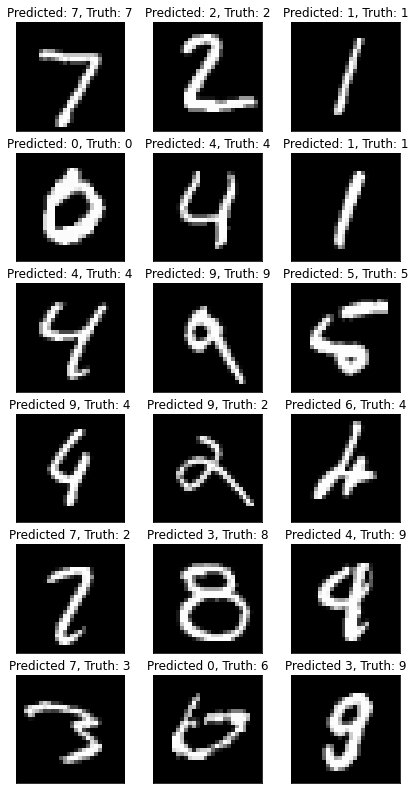

In [17]:
# load the model and create predictions on the test set
predicted_classes = mnist_model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

# Second MNIST

In [18]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(10, input_shape=(784,)))
model.add(Activation('relu'))                            


model.add(Dense(10))
model.add(Activation('softmax'))

In [19]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [20]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=50,
          verbose=2,
          validation_data=(X_test, Y_test))

Epoch 1/50
469/469 - 1s - loss: 0.8175 - accuracy: 0.7628 - val_loss: 0.3740 - val_accuracy: 0.8991
Epoch 2/50
469/469 - 1s - loss: 0.3423 - accuracy: 0.9049 - val_loss: 0.2976 - val_accuracy: 0.9159
Epoch 3/50
469/469 - 1s - loss: 0.2914 - accuracy: 0.9178 - val_loss: 0.2679 - val_accuracy: 0.9241
Epoch 4/50
469/469 - 1s - loss: 0.2676 - accuracy: 0.9241 - val_loss: 0.2535 - val_accuracy: 0.9275
Epoch 5/50
469/469 - 1s - loss: 0.2526 - accuracy: 0.9278 - val_loss: 0.2418 - val_accuracy: 0.9329
Epoch 6/50
469/469 - 1s - loss: 0.2419 - accuracy: 0.9318 - val_loss: 0.2348 - val_accuracy: 0.9334
Epoch 7/50
469/469 - 1s - loss: 0.2337 - accuracy: 0.9334 - val_loss: 0.2286 - val_accuracy: 0.9340
Epoch 8/50
469/469 - 1s - loss: 0.2274 - accuracy: 0.9356 - val_loss: 0.2264 - val_accuracy: 0.9359
Epoch 9/50
469/469 - 1s - loss: 0.2232 - accuracy: 0.9368 - val_loss: 0.2229 - val_accuracy: 0.9348
Epoch 10/50
469/469 - 1s - loss: 0.2182 - accuracy: 0.9380 - val_loss: 0.2213 - val_accuracy: 0.9361

Saved trained model at keras_mnist2.h5 


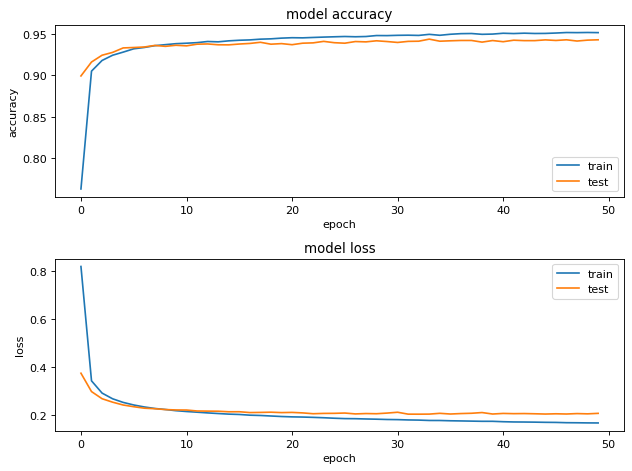

In [23]:
# saving the model
save_dir = ""
model_name = 'keras_mnist2.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# plotting the metrics
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [24]:
# Check, how well our model performs
mnist_model = load_model("keras_mnist2.h5")
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 0s - loss: 0.2071 - accuracy: 0.9427
Test Loss 0.20713569223880768
Test Accuracy 0.9427000284194946



9427  classified correctly
573  classified incorrectly


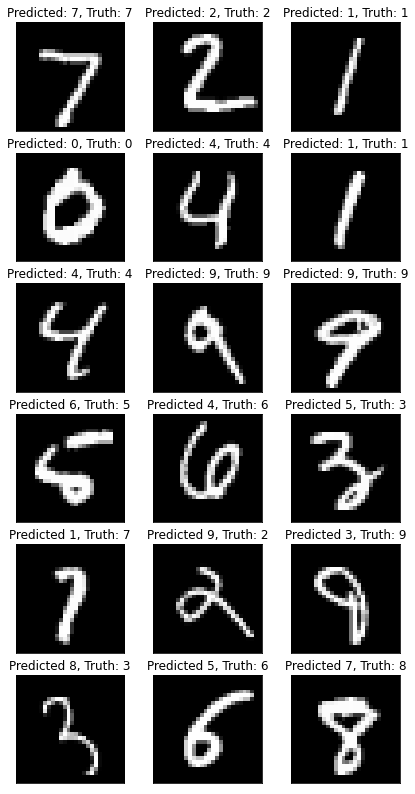

In [25]:
# load the model and create predictions on the test set
predicted_classes = mnist_model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

In [26]:
first_layer_weights = model.layers[0].get_weights()[0]
second_layer_weights = model.layers[2].get_weights()[0]

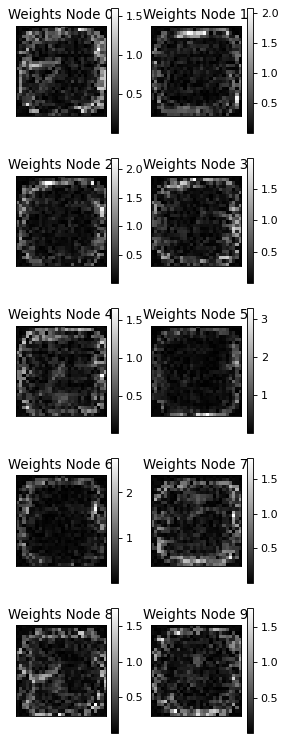

In [53]:
fig = plt.figure(figsize=(4, 12), dpi=80)
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.imshow(abs(first_layer_weights[:, i]).reshape(28,28), cmap='gray', interpolation=None, resample=False)
    plt.title("Weights Node {}".format(i))
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()

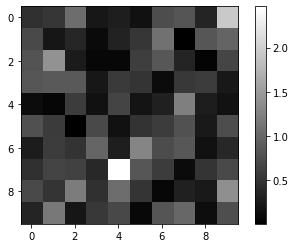

In [54]:
plt.imshow(abs(second_layer_weights), cmap='gray', interpolation=None, resample=False)
plt.colorbar()